In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv(r"D:\New Volume\Data Analysis\Land Use\FAOSTAT_LandUse_SouthAsia.csv")

# Define the new categories based on the "Item" values
def categorize_item(item):
    if item in ["Country area", "Land area", "Land area equipped for irrigation"]:
        return None  # Remove "Country area", "Land area", and "Land area equipped for irrigation"
    elif item in ["Agriculture", "Cropland", "Arable land", "Temporary crops", "Permanent crops"]:
        return "Farmland"
    elif item in ["Perm. meadows & pastures - Nat. growing", "Forest land", "Naturally regenerating forest", "Planted Forest", "Primary Forest"]:
        return "Forest Land"
    elif item in ["Inland waters", "Agriculture area actually irrigated"]:
        return item
    else:
        return None  # Remove "Other Land" and other unspecified categories

# Apply the function to create a new column
df['Category'] = df['Item'].apply(categorize_item)

# Filter out the rows where Category is None (removing "Other Land", "Country Area", "Land area", and "Land area equipped for irrigation")
df = df[df['Category'].notnull()]

# Group the data by Area and Category and sum the Value
df_grouped = df.groupby(['Area', 'Category'])['Value'].sum().reset_index()

# Display the grouped DataFrame
print(df_grouped.head())

analysis_results = pd.DataFrame(df)

# Export to CSV
analysis_results.to_csv('D:/New Volume/Data Analysis/Land Use/analysis_results.csv', index=False)



          Area                             Category        Value
0  Afghanistan  Agriculture area actually irrigated    45913.000
1  Afghanistan                             Farmland  1251460.000
2  Afghanistan                          Forest Land   683695.360
3  Afghanistan                        Inland waters     1386.000
4   Bangladesh  Agriculture area actually irrigated    70826.614


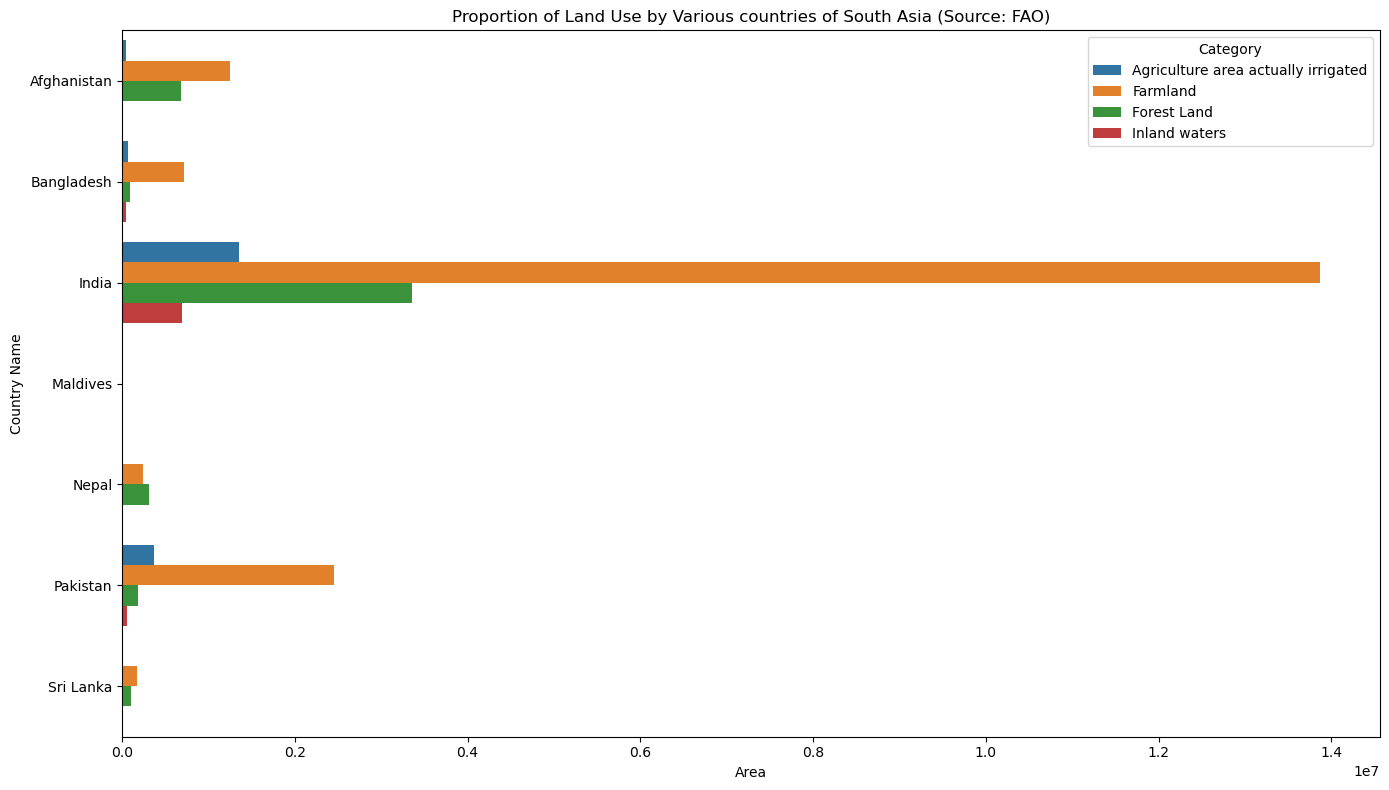

In [7]:
# Plot the data with Area and Category on the Y-axis and Value on the X-axis
plt.figure(figsize=(14, 8))
sns.barplot(y='Area', x='Value', hue='Category', data=df_grouped)

# Add titles and labels
plt.title('Proportion of Land Use by Various countries of South Asia (Source: FAO)')
plt.xlabel('Area')
plt.ylabel('Country Name')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

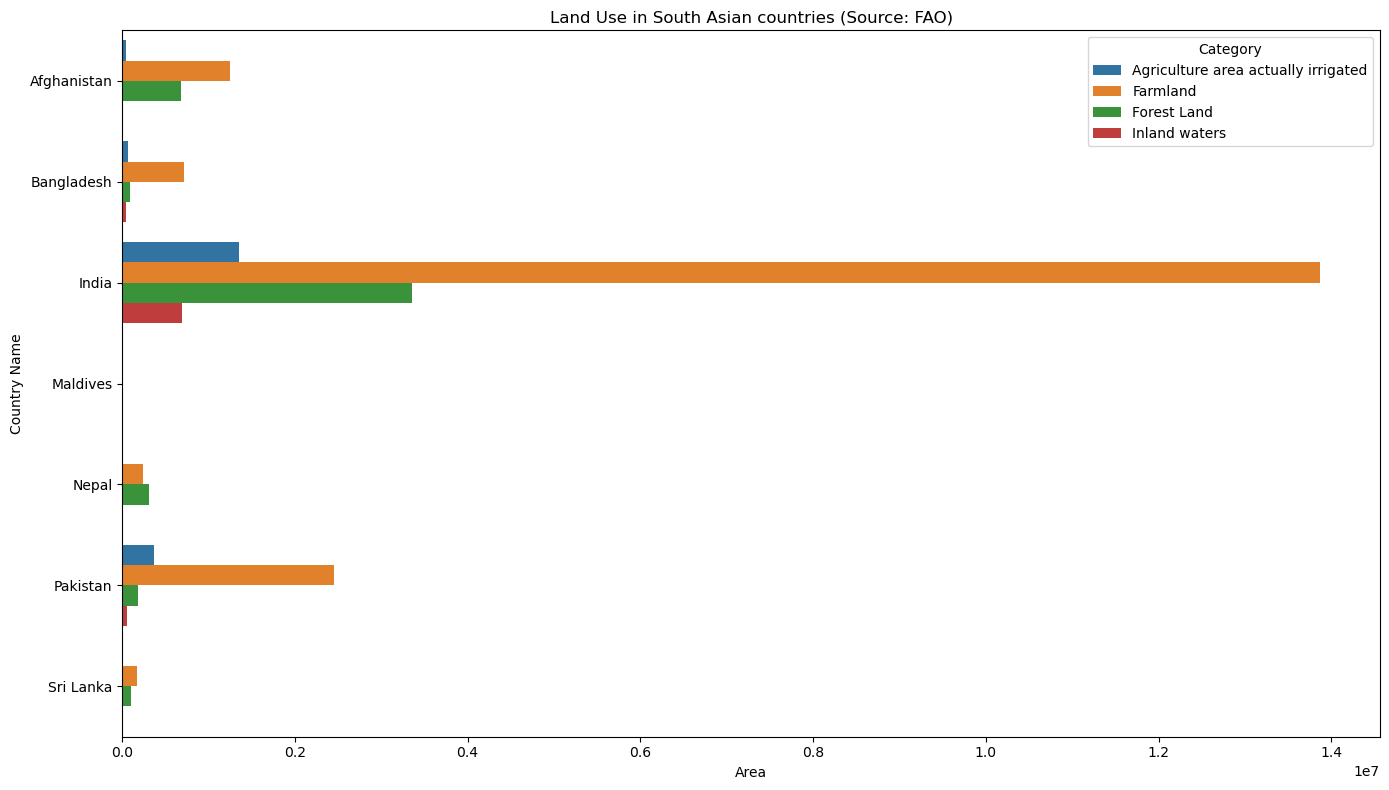

In [49]:
# Plot the data with Area and Category on the Y-axis and Value on the X-axis
plt.figure(figsize=(14, 8))
sns.barplot(y='Area', x='Value', hue='Category', data=df_grouped)
from openpyxl import Workbook
from openpyxl.drawing.image import Image

# Add titles and labels
plt.title('Land Use in South Asian countries (Source: FAO)')
plt.xlabel('Area')
plt.ylabel('Country Name')
plt.savefig('diagram.png')
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
wb = Workbook()
ws = wb.active
img = Image('diagram.png')
ws.add_image(img, 'A1')
wb.save('Land_Use_Analysis.xlsx')

In [34]:
df.to_csv('Land Use in South Asia.csv', index=False)
